In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
#%matplotlib inline
%matplotlib notebook
from ipywidgets import interact
import matplotlib.patches as patch
from shapely.geometry import MultiPoint
from descartes.patch import PolygonPatch
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay
from shapely.ops import cascaded_union, polygonize
import shapely.geometry as geometry

In [4]:
#находим косинус, чтобы найти координату точки по Х
def tcos(a,b,c):
    return ((b**2+c**2-a**2)/(2*b*c))

In [5]:
#находим синус, чтобы найти координату точки по Y
def tsin(t):
    return(1-t**2)

In [6]:
#функция для построения патча, то есть рабочей области робота
def plot_polygon(polygon,X,Y): 
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    margin = .3
    x_min, y_min, x_max, y_max = polygon.bounds
    ax.set_xlim([x_min-margin, x_max+margin])
    ax.set_ylim([y_min-margin, y_max+margin])
    patch = PolygonPatch(polygon, fc='#999999',
                         ec='#000000', fill=True,
                         zorder=-1)
    dir(ax)
    ax.scatter(X,Y, color='#f16824')
    ax.add_patch(patch)
    return fig

In [7]:
#не особо разобрался, как эта функция работает, но её суть в том, что она строет наименьшую невыпуклую оболочку по точкам, 
#которые я генерирую для рабочей области робота с коэффициентом альфа, который показывает, насколько близки должны 
#быть точки друг к другу
def alpha_shape(points, alpha):
    def add_edge(edges, edge_points, coords, i, j):
            if (i, j) in edges or (j, i) in edges:
                return
            edges.add( (i, j) )
            edge_points.append(coords[ [i, j] ])
    coords = points
    tri = Delaunay(coords)
    edges = set()
    edge_points = []
    for ia, ib, ic in tri.vertices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        s = (a + b + c)/2.0
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        if circum_r < 1.0/alpha:
            add_edge(edges, edge_points, coords, ia, ib)
            add_edge(edges, edge_points, coords, ib, ic)
            add_edge(edges, edge_points, coords, ic, ia)
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points, m
#concave_hull, edge_points = alpha_shape(points,alpha=1.87)

In [8]:
#основная функция, в которой создаётся множество точек из заданных промежутков для длин каждой ... и по этим точкам строится рабочая
#область робота
def f(l1_l,l2_l,l1_h,l2_h,d):
    A=[]
    X=[]
    Y=[]
    if (d+l1_l>l2_h) & (d+l2_l>l1_h) & (l1_l+l2_l>d) & (l1_l<l1_h) & (l2_l<l2_h):
        plt.close()
        l1=np.linspace(l1_l,l1_h,10)
        l2=np.linspace(l2_l,l2_h,10)
        for i in range(0,len(l1)):
            for j in range(0,len(l2)):
                X.append(tcos(l2[j],l1[i],d)*l1[i])
                Y.append(tsin(tcos(l2[j],l1[i],d))*l1[i])
        #fig = pl.figure(figsize=(10,10))
        #ax = fig.add_subplot(111)
        #plt.scatter(X, Y)
        A=np.column_stack((X,Y))
        concave_hull, edge_points, m = alpha_shape(A,alpha=1)
        _ = plot_polygon(concave_hull,X,Y)
        #for i in range(len(edge_points)):
            #for j in range(2):
            #plt.scatter(edge_points[i][1][0],edge_points[i][1][1])
       # print(len(edge_points))
        #print(edge_points[260][0][0])
        #plt.plot(edge_points)
        #qq=patch.Polygon(A)
        #hull=ConvexHull(A)
        #for simplex in hull.simplices:
        #    plt.plot(A[simplex, 0], A[simplex, 1], 'k-')
        #tri = Delaunay(A)
       # plt.triplot(A[:,0], A[:,1], tri.simplices.copy())
        #plt.plot(A[:,0], A[:,1], 'o')
        #plt.show()
    else:
        print('Неверные данные')

In [9]:
#A=[]
#X=[]
#Y=[]
interact(f, l1_l=(3,15), l2_l=(3,15), l1_h=(5,20), l2_h=(5,20), d=(3,15))

A Jupyter Widget

<function __main__.f>

3.54035308974
7.7739372264


<IPython.core.display.Javascript object>


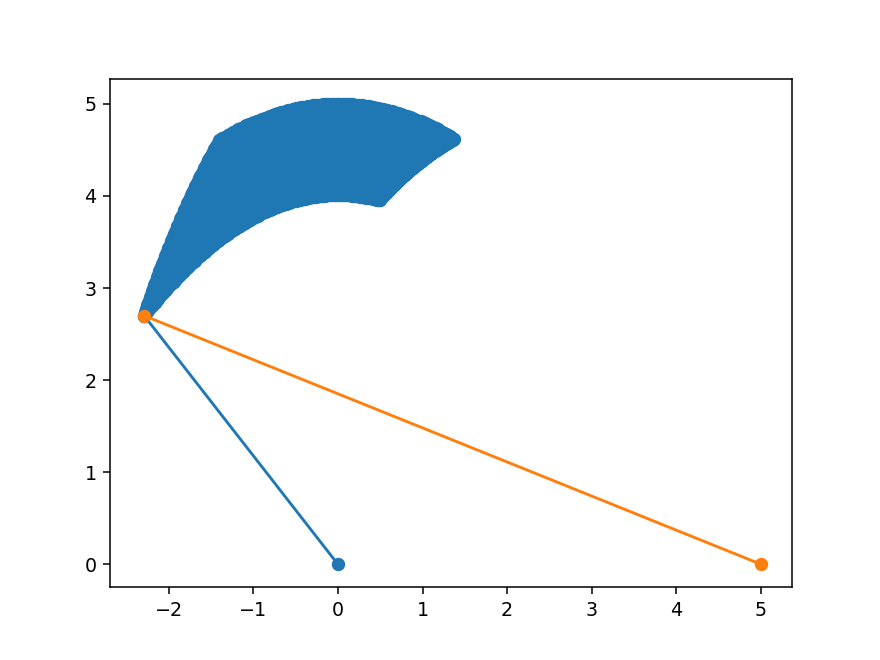

In [188]:
ax=-2.29
ay=2.7
x1, y1 = [0, ax], [0, ay]
x2, y2 = [ax, d], [ay, 0]
#xc, yc=[tcos(l2,l1,d)*l1], [tsin(tcos(l2,l1,d))]
print(np.sqrt((x1[1]-x1[0])**2+(y1[1]-y1[0])**2))
print(np.sqrt((x2[1]-x2[0])**2+(y2[1]-y2[0])**2))
plt.plot(x1, y1, x2, y2, marker = 'o')